<a href="https://colab.research.google.com/github/hongjai-rhee/public/blob/master/GOLD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split   
from sklearn import ensemble              
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
!pip install scikit-misc
!pip install pdpbox

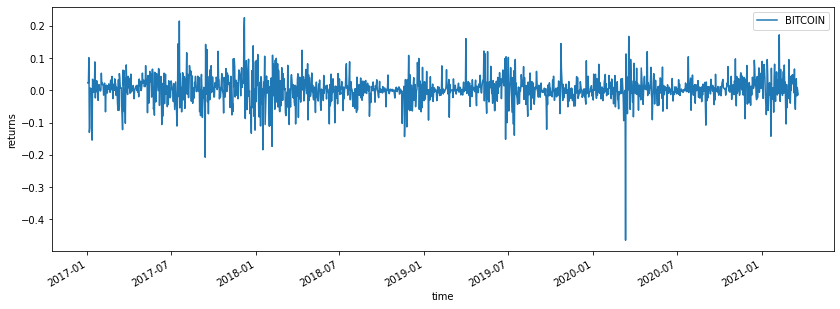

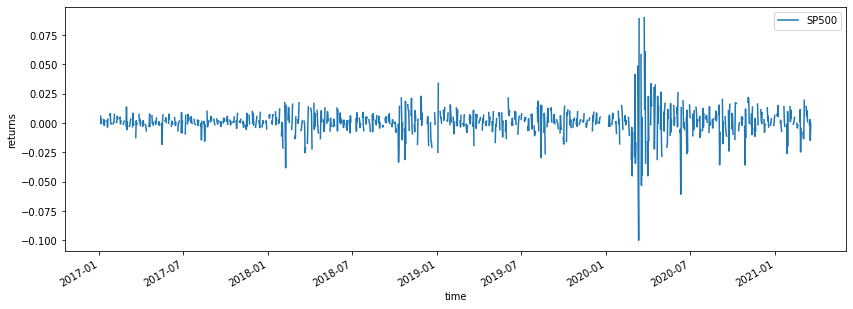

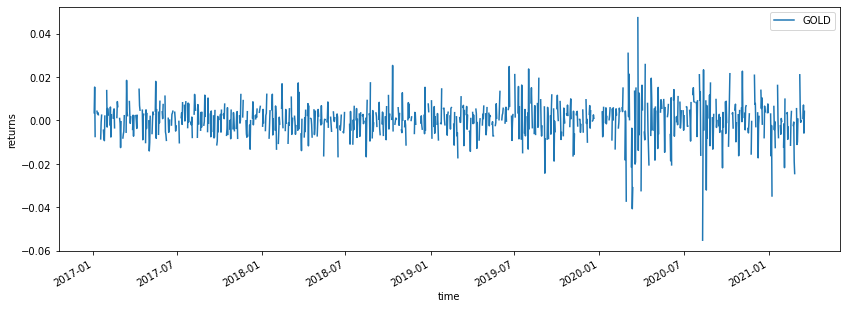

In [ ]:
from pandas_datareader import data as wb
import datetime

assets=['BTC-USD', '^GSPC', 'GLD' ]  ## GLD CL.NYM 
data=pd.DataFrame()
for asset in assets:
    data[asset]=wb.DataReader(asset, data_source='yahoo', start='2017-1-1', end='2021-3-20')['Close']


df1 = data
df1["ROR1"] = np.log(df1["BTC-USD"]).diff()
df1["ROR2"] = np.log(df1["^GSPC"]).diff()
df1["ROR3"] = np.log(df1["GLD"]).diff()


#df1 = df1.dropna()
df1.head()

Y1=df1.ROR1
Y2=df1.ROR2
Y3=df1.ROR3

fig, ax = plt.subplots(figsize=(14, 5))
df1.plot(y="ROR1", label='BITCOIN', ax=ax)
ax.set(xlabel='time', ylabel='returns')
ax.legend();

fig, ax = plt.subplots(figsize=(14, 5))
df1.plot(y="ROR2", label='SP500', ax=ax)
ax.set(xlabel='time', ylabel='returns')
ax.legend();

fig, ax = plt.subplots(figsize=(14, 5))
df1.plot(y="ROR3", label='GOLD', ax=ax)
ax.set(xlabel='time', ylabel='returns')
ax.legend();



 

In [ ]:
df1

,BTC-USD,^GSPC,GLD,ROR1,ROR2,ROR3
Date,,,,,,
2017-01-01,998.325012,NaN,NaN,NaN,NaN,NaN
2017-01-02,1021.750000,NaN,NaN,0.023193,NaN,NaN
2017-01-03,1043.839966,2257.830078,110.470001,0.021389,NaN,NaN
2017-01-04,1154.729980,2270.750000,110.860001,0.100960,0.005706,0.003524
2017-01-05,1013.380005,2269.000000,112.580002,-0.130575,-0.000771,0.015396
...,...,...,...,...,...,...
2021-03-17,58870.894531,3974.120117,163.509995,0.035724,0.002875,0.007120
2021-03-18,57858.921875,3915.459961,162.559998,-0.017339,-0.014871,-0.005827
2021-03-19,58346.652344,3913.100098,163.240005,0.008394,-0.000603,0.004174


In [ ]:
x3 =Y1.ewm(3).mean()
x10=Y1.ewm(10).mean()
x30=Y1.ewm(30).mean()
z3=Y2.ewm(3).mean()
z10=Y2.ewm(10).mean()
z30=Y2.ewm(30).mean()
w3=Y3.ewm(3).mean()
w10=Y3.ewm(10).mean()
w30=Y3.ewm(30).mean()

In [ ]:
X=pd.DataFrame(x3[1:])
X.columns=['bit3']
X['bit10']=x10[1:]
X['bit30']=x30[1:]
X['sp3']=z3[1:]
X['sp10']=z10[1:]
X['sp30']=z30[1:]
X['gold3']=w3[1:]
X['gold10']=w10[1:]
X['gold30']=w30[1:]


y=-1*(Y1<0)+1  ## two states 
y1=-1*(Y2<0)+1
y2=-1*(Y3<0)+1

T=len(Y1)
X['bit(t-1)']=y[0:T-1].values
#X['SP(t-1)']=y1[0:T-1].values
#X['GOLD(t-1)']=y2[0:T-1].values

X['y']=y[1:].values
X=X.dropna()
y=X['y']
del X['y']

In [ ]:
X

,bit3,bit10,bit30,sp3,sp10,sp30,gold3,gold10,gold30,bit(t-1)
Date,,,,,,,,,,
2017-01-04,0.056237,0.051022,0.049369,0.005706,0.005706,0.005706,0.003524,0.003524,0.003524,1
2017-01-05,-0.012083,-0.001058,0.002147,0.002005,0.002313,0.002414,0.010308,0.009743,0.009557,1
2017-01-06,-0.046214,-0.028673,-0.023102,0.002656,0.002751,0.002792,0.002651,0.003476,0.003719,0
2017-01-07,-0.030014,-0.021216,-0.017655,0.002656,0.002751,0.002792,0.002651,0.003476,0.003719,0
2017-01-08,-0.020526,-0.016718,-0.014427,0.002656,0.002751,0.002792,0.002651,0.003476,0.003719,1
...,...,...,...,...,...,...,...,...,...,...
2021-03-17,0.009337,0.009334,0.009418,0.002347,0.001839,0.000782,0.003958,0.001117,-0.001289,1
2021-03-18,0.002668,0.006909,0.008555,-0.003644,-0.000649,-0.000115,0.000553,0.000083,-0.001549,1
2021-03-19,0.004100,0.007044,0.008550,-0.002680,-0.000643,-0.000143,0.001701,0.000659,-0.001229,0


# Training/ Test set 

In [ ]:
y_train=y[0:1000]
y_test=y[1000:]
X_train=X[0:1000]
X_test=X[1000:]

In [ ]:
X_train

,bit3,bit10,bit30,sp3,sp10,sp30,gold3,gold10,gold30,bit(t-1),SP(t-1),GOLD(t-1)
Date,,,,,,,,,,,,
2017-01-04,0.056237,0.051022,0.049369,0.005706,0.005706,0.005706,0.003524,0.003524,0.003524,1,1,1
2017-01-05,-0.012083,-0.001058,0.002147,0.002005,0.002313,0.002414,0.010308,0.009743,0.009557,1,1,1
2017-01-06,-0.046214,-0.028673,-0.023102,0.002656,0.002751,0.002792,0.002651,0.003476,0.003719,0,0,1
2017-01-07,-0.030014,-0.021216,-0.017655,0.002656,0.002751,0.002792,0.002651,0.003476,0.003719,0,1,0
2017-01-08,-0.020526,-0.016718,-0.014427,0.002656,0.002751,0.002792,0.002651,0.003476,0.003719,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-25,-0.035609,-0.017911,-0.006993,-0.000322,0.000519,0.001025,-0.004895,-0.002009,-0.000352,0,0,1
2019-09-26,-0.022648,-0.014807,-0.006243,-0.001056,0.000077,0.000828,-0.003289,-0.001750,-0.000348,0,1,0
2019-09-27,-0.017166,-0.013526,-0.006065,-0.002411,-0.000689,0.000485,-0.003883,-0.002233,-0.000616,1,0,0


# XGBoost: eXtra Gradient Boosting
Salient features of XGBoost which make it different from other gradient boosting algorithms include:[15][16][17]

Clever penalization of trees
A proportional shrinking of leaf nodes
Newton Boosting
Extra randomization parameter
Implementation on single, distributed systems and out-of-core computation

In [ ]:

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [ ]:
seed=1851   

# fit model no training data
model = XGBClassifier(
      learning_rate =0.03, 
      n_estimators=400,  
                      max_depth=5,
                      random_state=seed
                      )
model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.03, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1851,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

# make predictions for test data
y_pred1 = model.predict(X_train)
predictions1 = [round(value) for value in y_pred1]

y_pred2 = model.predict(X_test)
predictions2 = [round(value) for value in y_pred2]

# evaluate predictions
accuracy1 = accuracy_score(y_train, predictions1)
accuracy2 = accuracy_score(y_test, predictions2)

print("Training Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("Test Accuracy: %.2f%%" % (accuracy2 * 100.0))

Training Accuracy: 97.40%
Test Accuracy: 74.34%


[0.19890401 0.0976304  0.08542375 0.07814827 0.07620286 0.06838015
 0.07113237 0.07989563 0.07258813 0.17169455]


<Figure size 1440x1440 with 0 Axes>

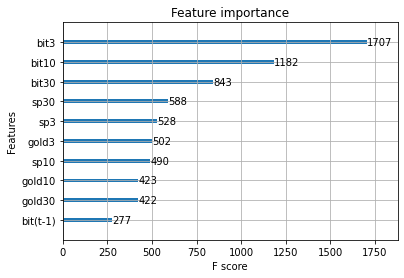

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot

fig = plt.figure(figsize=(20, 20))

print(model.feature_importances_)
plot_importance(model)
#pyplot.show()

Text(0.5, 0, 'Permutation Importance')

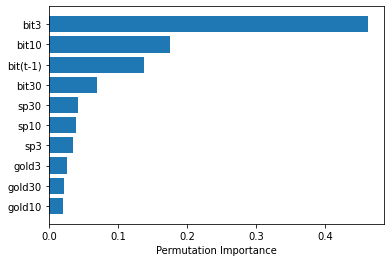

In [ ]:
xNames = np.array(list(X_train))

perm_importance = permutation_importance(model, X_train, y_train)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(xNames[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [ ]:
predictions

[1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.22%


In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

# Other covariates? 
https://www.sciencedirect.com/science/article/pii/S105752191830187X

https://www.etftrends.com/tactical-allocation-channel/bitcoins-correlation-to-markets-hits-a-record-in-2020/amp/

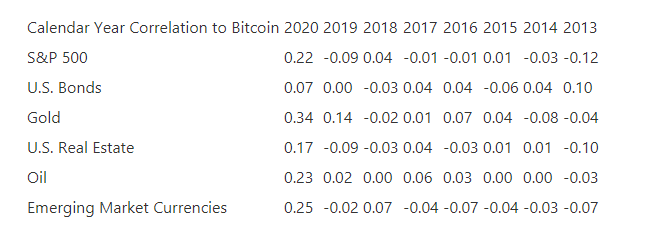

- Final Decision made by (weighted) voting from weak trees in the forest (ensemble). 

# Tuning Hyper-paramters (n_trees, learning_rate)

In [ ]:
seed=1851   
xNames = np.array(list(X_train))

XX=np.arange(100,1000,100)   ## 10 by 10 grid search
YY=np.arange(0.0001,0.05,0.005)
Z= [ [0] * 10 for _ in range(10) ]

for i in range(10):           
    for j in range(10):  
      params = {'n_estimators': XX[i], 'learning_rate': YY[j]}
      m = ensemble.GradientBoostingClassifier(**params,random_state=seed)
      m.fit(X_train, y_train)
      acc1=round(m.score(X_test, y_test),3)
      Z[i][j]=acc1
      print(i, j, acc1)


0 0 0.539
0 1 0.663
0 2 0.682
0 3 0.687
0 4 0.687
0 5 0.691
0 6 0.695
0 7 0.691
0 8 0.685
0 9 0.695
1 0 0.539
1 1 0.682
1 2 0.687
1 3 0.693
1 4 0.693
1 5 0.699
1 6 0.702
1 7 0.702
1 8 0.693
1 9 0.7
2 0 0.539
2 1 0.687
2 2 0.693
2 3 0.693
2 4 0.699
2 5 0.693
2 6 0.717
2 7 0.697
2 8 0.693
2 9 0.704
3 0 0.539
3 1 0.687
3 2 0.691
3 3 0.702
3 4 0.702
3 5 0.7
3 6 0.723
3 7 0.697
3 8 0.699
3 9 0.715
4 0 0.539
4 1 0.691
4 2 0.697
4 3 0.699
4 4 0.706
4 5 0.697
4 6 0.706
4 7 0.706
4 8 0.7
4 9 0.713
5 0 0.539
5 1 0.693
5 2 0.697
5 3 0.71
5 4 0.695
5 5 0.697
5 6 0.717
5 7 0.704
5 8 0.71
5 9 0.717
6 0 0.539
6 1 0.693
6 2 0.697
6 3 0.702
6 4 0.697
6 5 0.7
6 6 0.713
6 7 0.702
6 8 0.712
6 9 0.715
7 0 0.539
7 1 0.689
7 2 0.697
7 3 0.697
7 4 0.7
7 5 0.706
7 6 0.715
7 7 0.712
7 8 0.717
7 9 0.712
8 0 0.539
8 1 0.689
8 2 0.713
8 3 0.695
8 4 0.7
8 5 0.706
8 6 0.715
8 7 0.712
8 8 0.715
8 9 0.71


IndexError: ignored

# Contour plot (Z=hit rate for y_test)

In [ ]:
print(XX[3], YY[6])

400 0.0301


TypeError: ignored

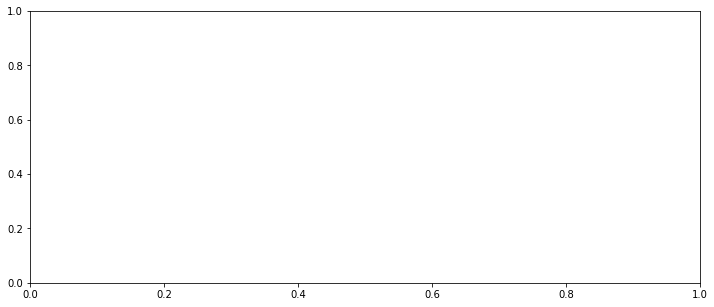

In [ ]:
plt.figure(figsize=(12, 5))
cp = plt.contourf(YY, XX, Z, cmap='RdGy',  color='black',
                 levels = np.linspace(np.min(Z), np.max(Z), 25) )
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 12}

plt.colorbar(cp)
plt.xlabel('Learning rate')        
plt.ylabel('# of ensemble trees')   
#plt.savefig('1727.svg')
plt.show()

## Final run with optimaized hyper parameters (n_tree=500, learning rate=0.03)

In [ ]:
seed=1851   
xNames = np.array(list(X_train))

params = {'n_estimators': 400,           ##  500
          'learning_rate': 0.0301}         ## 0.03

m = ensemble.GradientBoostingClassifier(**params,random_state=seed)
m.fit(X_train, y_train)
acc1=round(m.score(X_test, y_test),3)
acc2=round(m.score(X_train, y_train),3)

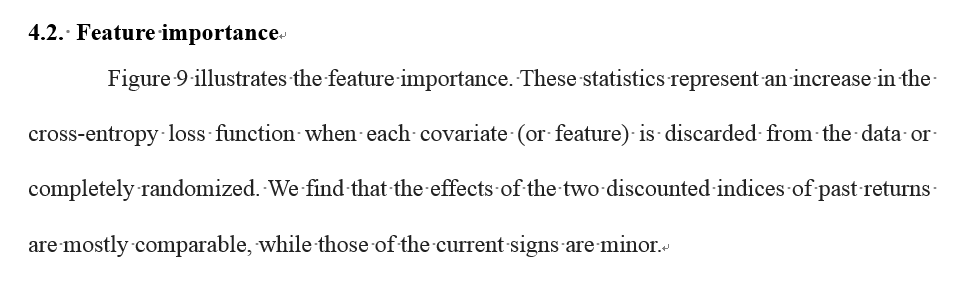

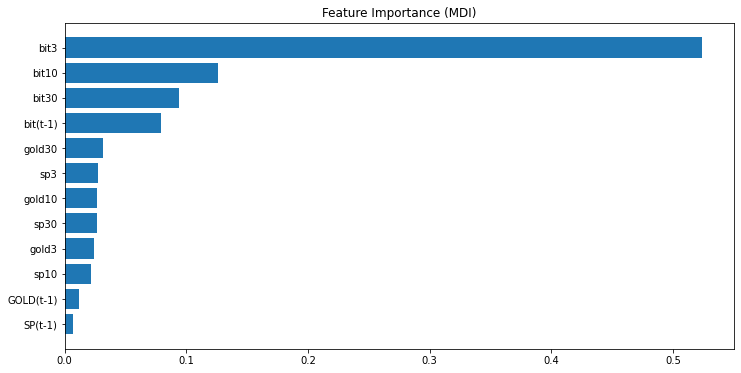

In [ ]:
#feature_importance = m.feature_importances_/np.max(m.feature_importances_)
feature_importance = m.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
#plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(xNames)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(m, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
#plt.subplot(1, 2, 2)
#plt.boxplot(result.importances[sorted_idx].T,
#            vert=False, labels=np.array(xNames)[sorted_idx])
#plt.title("Permutation Importance (test set)")
#fig.tight_layout()
plt.show()

# Training Fit

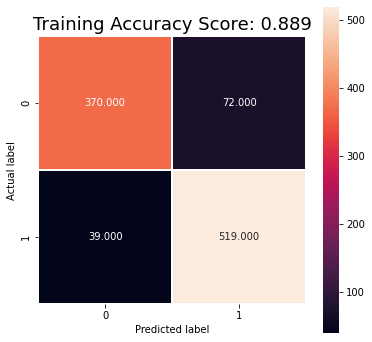

In [ ]:
import seaborn as sn 
from sklearn.metrics import accuracy_score, confusion_matrix 

acc=round(m.score(X_train, y_train),3)
con_mat = confusion_matrix(y_true=y_train, y_pred= m.predict(X_train)) 

# confusion matrix heatmap  
plt.figure(figsize=(6,6)) # chart size 
sn.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Training Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

# Test Fit

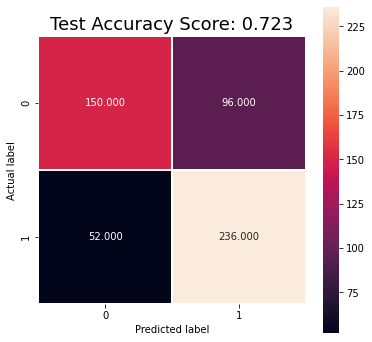

In [ ]:
acc=round(m.score(X_test, y_test),3)
con_mat = confusion_matrix(y_true=y_test, y_pred= m.predict(X_test)) 

# confusion matrix heatmap  
plt.figure(figsize=(6,6)) # chart size 
sn.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Test Accuracy Score: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

# 예측력이 이미 SDAE를 넘어섭니다. 주가 골드프라이스 등 몇가지 추가하면 더 높아질 것입니다. 

# 로지스틱 회귀모형보다 훨씬 우수합니다. 

0.568
0.5430711610486891


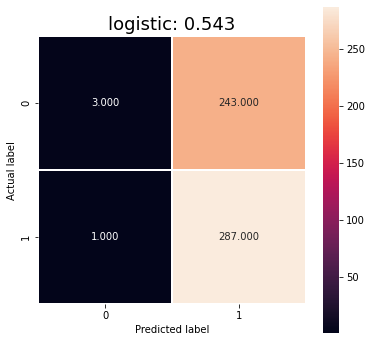

In [ ]:
from sklearn.linear_model import LogisticRegression

#print 'Train LogisticRegression()'
clf_init = LogisticRegression();
clf_init.fit(X_train, y_train);
clf_init.fit

print(clf_init.score(X_train, y_train))   ## 로지스틱 리그레션 설명
print(clf_init.score(X_test, y_test))     ## 로지스틱 리그레션 예측
#print 'Train LogisticRegression() is done'
#clf_init.coef_

y_logit=clf_init.predict(X_test)

acc=round(clf_init.score(X_test, y_test), 3)
con_mat = confusion_matrix(y_true=y_test, y_pred= y_logit) 

# 아래를 블럭 실행하기
# confusion matrix heatmap  
plt.figure(figsize=(6,6)) # chart size 
sn.heatmap(con_mat, annot=True, fmt=".3f", linewidths=.5, square = True);# , cmap = 'Blues_r' : map »ö»ó  
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'logistic: {0}'.format(acc) 
plt.title(all_sample_title, size = 18) 
plt.show() 

# Visualizing Covariate Effects by PDP
# 이 결과를 잘 해석하는 것이 필요합니다.

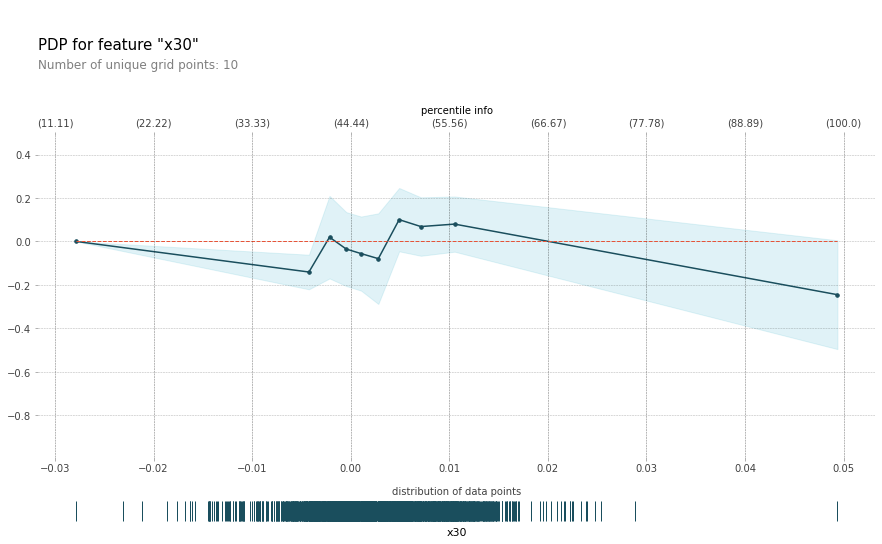

In [ ]:
from pdpbox import pdp, info_plots
k=xNames[3]
pdp_1 = pdp.pdp_isolate(model=m, dataset=X, model_features=list(X), feature=k)
#PDP Plot0
fig, axes = pdp.pdp_plot(pdp_1, k, plot_lines=False, center=True, frac_to_plot=0.5, plot_pts_dist=True,x_quantile=False, show_percentile=True)
#ICE Plot
#fig, axes = pdp.pdp_plot(pdp_1, k, plot_lines=True, center=True, frac_to_plot=1, plot_pts_dist=True,x_quantile=True, show_percentile=True)


# Interaction Effect

(<Figure size 540x684 with 3 Axes>,
 {'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc1ce18b690>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fc1ce0956d0>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


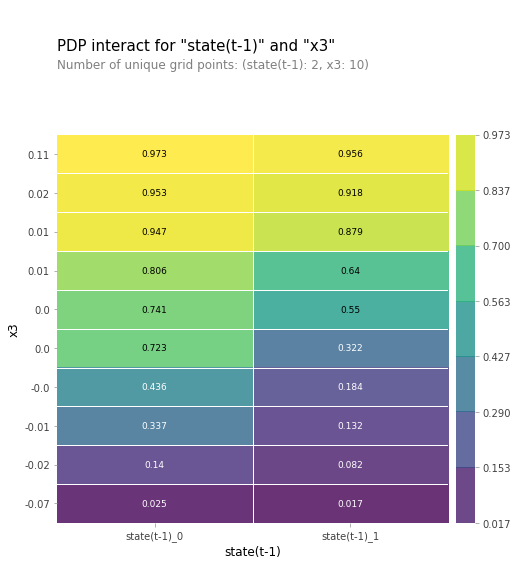

In [ ]:
k1=xNames[0]
k2=xNames[1]

# Two variable interaction plot
inter= pdp.pdp_interact(model=m, dataset=X_train, model_features=X_train.columns,
                             features=[k1,k2])
pdp.pdp_interact_plot(inter, [k1,k2], x_quantile=False, plot_type='grid', plot_pdp=False) 

# 변동 방향과 크기를 모두 예측한 다음, 방향은 잘되는데 크기는 안된다.
# 이렇게 보일수도 있겠지요. 전 크기는 안될거라고 생각합니다. 

# K-Fold 교차검증

https://velog.io/@skyepodium/K-Fold-%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D#1-kfold-%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D
